In [3]:
from google.colab import drive
# Mount google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [94]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import numpy as np
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [95]:
# Locate csv path
file_path = '/content/drive/MyDrive/healthcare-dataset-stroke-data.csv'

# Read csv into dataframe
df = pd.read_csv(file_path)

In [96]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [97]:
# Look for null values
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [98]:
# Look for duplicate value
df.duplicated().sum()

0

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [100]:
# Data Cleaning

# Remove useless column
df.drop(columns=['id'], inplace=True)

# Remove row with null value in the 'bmi' column
df = df.dropna(subset=['bmi'])

# Remove rows where 'gender' is 'Other'
df = df[df['gender'] != 'Other'].copy()

# Replace value with binary representation
df['gender'] = df['gender'].replace({'Male': 1, 'Female': 0})
df['ever_married'] = df['ever_married'].replace({'Yes': 1, 'No': 0})
df['Residence_type'] = df['Residence_type'].replace({'Urban': 1,'Rural':0})

# Perform one-hot encoding for 'work_type', 'smoking_status'
df = pd.get_dummies(df, columns=['work_type', 'smoking_status'], drop_first=True)


df.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,1,228.69,36.6,1,0,1,0,0,1,0,0
2,1,80.0,0,1,1,0,105.92,32.5,1,0,1,0,0,0,1,0
3,0,49.0,0,0,1,1,171.23,34.4,1,0,1,0,0,0,0,1
4,0,79.0,1,0,1,0,174.12,24.0,1,0,0,1,0,0,1,0
5,1,81.0,0,0,1,1,186.21,29.0,1,0,1,0,0,1,0,0


In [101]:
# Extract the columns to be scaled
columns_to_scale = ['avg_glucose_level', 'bmi', 'age']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Display the first few rows of the updated DataFrame
df.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,1.069938,0,1,1,1,2.777797,0.981145,1,0,1,0,0,1,0,0
2,1,1.646336,0,1,1,0,0.014016,0.459086,1,0,1,0,0,0,1,0
3,0,0.271847,0,0,1,1,1.484266,0.701016,1,0,1,0,0,0,0,1
4,0,1.601998,1,0,1,0,1.549325,-0.623231,1,0,0,1,0,0,1,0
5,1,1.690675,0,0,1,1,1.821493,0.013426,1,0,1,0,0,1,0,0


In [102]:
### SPLITING DATA TO TRAIN & TEST & VALIDATION

# Exclude 'stroke' column from the features
X = df.drop('stroke', axis=1)  # Features (excluding 'stroke')
y = df['stroke']  # Target variable 'stroke'

# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

# Define the oversampler
oversampler = RandomOverSampler(random_state=42)

# Perform oversampling on the training data
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train, y_train)

In [103]:
# Count of classes before oversampling
print("Before Oversampling:")
print(y_train.value_counts())

# Count of classes after oversampling
print("\nAfter Oversampling:")
print(pd.Series(y_train_oversampled).value_counts())

Before Oversampling:
0    2641
1     107
Name: stroke, dtype: int64

After Oversampling:
0    2641
1    2641
Name: stroke, dtype: int64


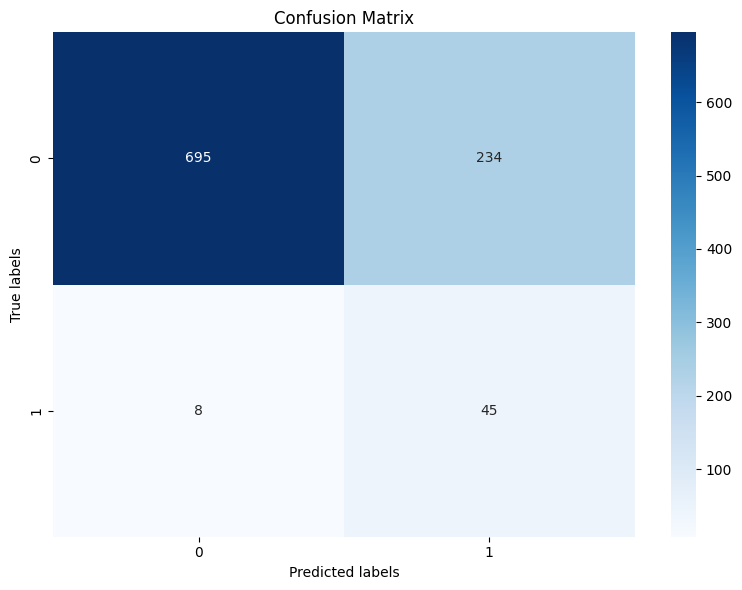

Classification Report - Test Set:
              precision    recall  f1-score   support

           0       0.99      0.75      0.85       929
           1       0.16      0.85      0.27        53

    accuracy                           0.75       982
   macro avg       0.57      0.80      0.56       982
weighted avg       0.94      0.75      0.82       982



In [104]:
### MODEL LOGREG

# Initialize and train the Logistic Regression model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_oversampled, y_train_oversampled)

# Predict on test set
y_pred_test = logreg.predict(X_test)

# Confusion Matrix for Test Set
conf_matrix_test = confusion_matrix(y_test, y_pred_test)

# Plot Confusion Matrix for Test Set
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# Adjust layout
plt.tight_layout()
plt.show()

# Classification Report for Test Set
print("Classification Report - Test Set:")
print(classification_report(y_test, y_pred_test, zero_division=1))

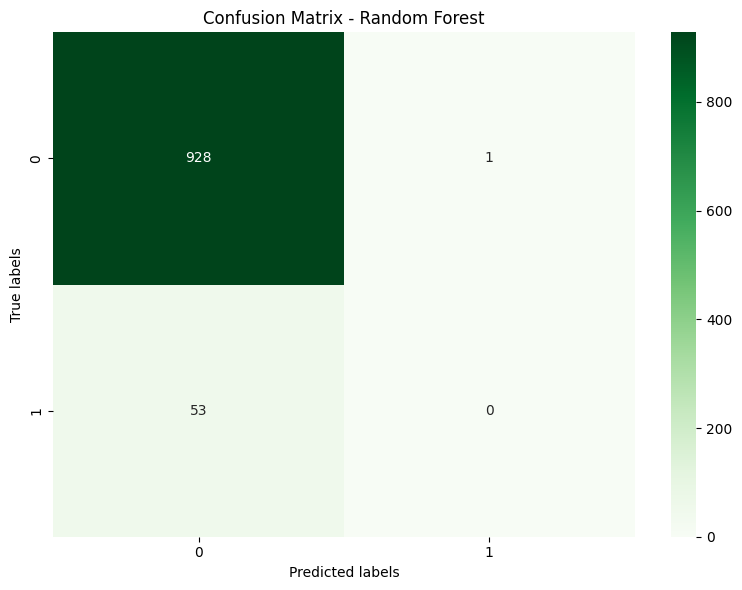

Classification Report - Test Set (Random Forest):
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       0.00      0.00      0.00        53

    accuracy                           0.95       982
   macro avg       0.47      0.50      0.49       982
weighted avg       0.89      0.95      0.92       982



In [105]:
### MODEL RF

# Initialize and train the Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predict on test set
y_pred_test_rf = rf.predict(X_test)

# Confusion Matrix for Test Set
conf_matrix_test_rf = confusion_matrix(y_test, y_pred_test_rf)

# Plot Confusion Matrix for Test Set
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test_rf, annot=True, cmap='Greens', fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Random Forest')

# Adjust layout
plt.tight_layout()
plt.show()

# Classification Report for Test Set
print("Classification Report - Test Set (Random Forest):")
print(classification_report(y_test, y_pred_test_rf, zero_division=1))

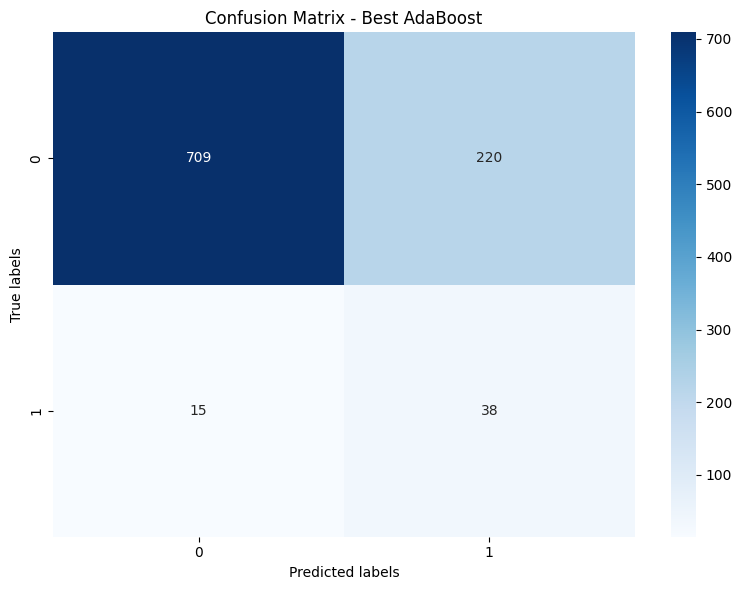

Classification Report - Test Set (AdaBoost):
              precision    recall  f1-score   support

           0       0.98      0.76      0.86       929
           1       0.15      0.72      0.24        53

    accuracy                           0.76       982
   macro avg       0.56      0.74      0.55       982
weighted avg       0.93      0.76      0.82       982



In [106]:
# Train AdaBoost with best parameters
adaboost = AdaBoostClassifier(random_state=42)
adaboost.fit(X_train_oversampled, y_train_oversampled)

# Predict on the test set
y_pred_test_adaboost = adaboost.predict(X_test)

# Confusion Matrix for Test Set - Best AdaBoost
conf_matrix_test_adaboost = confusion_matrix(y_test, y_pred_test_adaboost)

# Plot Confusion Matrix for Test Set - Best AdaBoost
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test_adaboost, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Best AdaBoost')

# Show the plot
plt.tight_layout()
plt.show()

# Classification Report for Test Set - Best AdaBoost
print("Classification Report - Test Set (AdaBoost):")
print(classification_report(y_test, y_pred_test_adaboost, zero_division=1))

In [111]:
### MODEL TUNING

# Parameter grid for Logistic Regression
logreg_params = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# Parameter grid for Random Forest
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30]
}

# Parameter grid for AdaBoost
adaboost_params = {
    'n_estimators': [1,3,5,10, 50, 100, 200],
    'learning_rate': [0.001,0.003, 0.005, 0.01, 0.1,0.5, 1]
}

logreg = LogisticRegression(random_state=42)
rf = RandomForestClassifier(random_state=42)
adaboost = AdaBoostClassifier(random_state=42)

# Perform fine-tuning using the validation set
logreg_grid_val = GridSearchCV(logreg, logreg_params, cv=5, scoring='accuracy')
logreg_grid_val.fit(X_val, y_val)

rf_grid_val = GridSearchCV(rf, rf_params, cv=5, scoring='accuracy')
rf_grid_val.fit(X_val, y_val)

adaboost_grid = GridSearchCV(adaboost, adaboost_params, cv=5, scoring='accuracy')
adaboost_grid.fit(X_val, y_val)

# Get best parameters and best score for Logistic Regression after fine-tuning
print("Best Parameters for Logistic Regression after fine-tuning:", logreg_grid_val.best_params_)
print("Best Accuracy Score for Logistic Regression after fine-tuning:", logreg_grid_val.best_score_)

# Get best parameters and best score for Random Forest after fine-tuning
print("\nBest Parameters for Random Forest after fine-tuning:", rf_grid_val.best_params_)
print("Best Accuracy Score for Random Forest after fine-tuning:", rf_grid_val.best_score_)

# Get best parameters and best score for AdaBoost after fine-tuning
print("\nBest Parameters for AdaBoost after fine-tuning:", adaboost_grid.best_params_)
print("Best Accuracy Score for AdaBoost after fine-tuning:", adaboost_grid.best_score_)


Best Parameters for Logistic Regression after fine-tuning: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Accuracy Score for Logistic Regression after fine-tuning: 0.9584060584204831

Best Parameters for Random Forest after fine-tuning: {'max_depth': None, 'n_estimators': 100}
Best Accuracy Score for Random Forest after fine-tuning: 0.9575586007933646

Best Parameters for AdaBoost after fine-tuning: {'learning_rate': 0.001, 'n_estimators': 1}
Best Accuracy Score for AdaBoost after fine-tuning: 0.9584060584204831


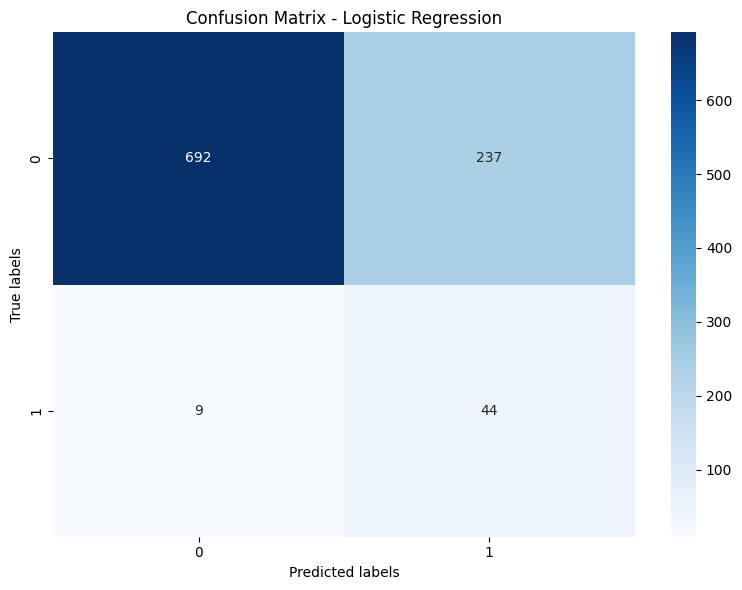

Classification Report - Test Set (Logistic Regression):
              precision    recall  f1-score   support

           0       0.99      0.74      0.85       929
           1       0.16      0.83      0.26        53

    accuracy                           0.75       982
   macro avg       0.57      0.79      0.56       982
weighted avg       0.94      0.75      0.82       982



In [108]:
# Initialize and train the Logistic Regression model with best parameters
logreg_best = LogisticRegression(C=0.1, penalty='l1', solver='liblinear', random_state=42)
logreg_best.fit(X_train_oversampled, y_train_oversampled)

# Predict on test set using Logistic Regression
y_pred_test_logreg = logreg_best.predict(X_test)

# Confusion Matrix for Test Set - Logistic Regression
conf_matrix_test_logreg = confusion_matrix(y_test, y_pred_test_logreg)

# Plot Confusion Matrix for Test Set - Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test_logreg, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Logistic Regression')

# Adjust layout
plt.tight_layout()
plt.show()

# Classification Report for Test Set - Logistic Regression
print("Classification Report - Test Set (Logistic Regression):")
print(classification_report(y_test, y_pred_test_logreg, zero_division=1))

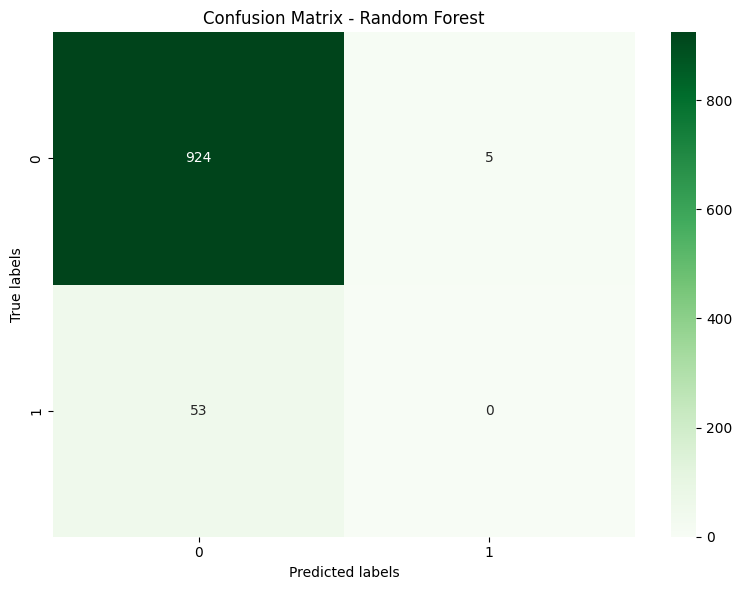

Classification Report - Test Set (Random Forest):
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       929
           1       0.00      0.00      0.00        53

    accuracy                           0.94       982
   macro avg       0.47      0.50      0.48       982
weighted avg       0.89      0.94      0.92       982



In [109]:
# Initialize and train the Random Forest model with best parameters
rf_best = RandomForestClassifier(max_depth=None, n_estimators=100, random_state=42)
rf_best.fit(X_train_oversampled, y_train_oversampled)

# Predict on test set using Random Forest
y_pred_test_rf = rf_best.predict(X_test)

# Confusion Matrix for Test Set - Random Forest
conf_matrix_test_rf = confusion_matrix(y_test, y_pred_test_rf)

# Plot Confusion Matrix for Test Set - Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test_rf, annot=True, cmap='Greens', fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Random Forest')

# Adjust layout
plt.tight_layout()
plt.show()

# Classification Report for Test Set - Random Forest
print("Classification Report - Test Set (Random Forest):")
print(classification_report(y_test, y_pred_test_rf, zero_division=1))

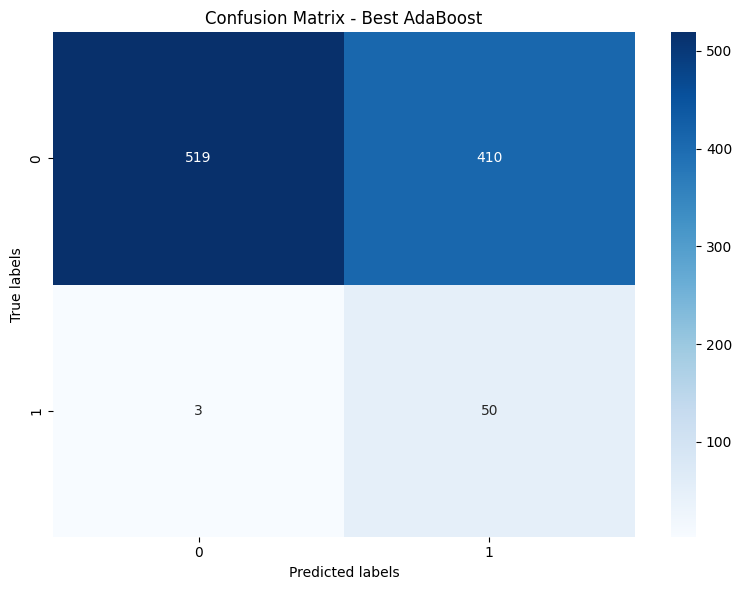

Classification Report - Test Set (AdaBoost):
              precision    recall  f1-score   support

           0       0.99      0.56      0.72       929
           1       0.11      0.94      0.19        53

    accuracy                           0.58       982
   macro avg       0.55      0.75      0.46       982
weighted avg       0.95      0.58      0.69       982



In [110]:
# Train AdaBoost with best parameters
best_adaboost = AdaBoostClassifier(n_estimators=1,learning_rate=0.001,random_state=42)
best_adaboost.fit(X_train_oversampled, y_train_oversampled)

# Predict on the test set
y_pred_test_best_adaboost = best_adaboost.predict(X_test)

# Confusion Matrix for Test Set - Best AdaBoost
conf_matrix_test_best_adaboost = confusion_matrix(y_test, y_pred_test_best_adaboost)

# Plot Confusion Matrix for Test Set - Best AdaBoost
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test_best_adaboost, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Best AdaBoost')

# Show the plot
plt.tight_layout()
plt.show()

# Classification Report for Test Set - Best AdaBoost
print("Classification Report - Test Set (AdaBoost):")
print(classification_report(y_test, y_pred_test_best_adaboost, zero_division=1))